# 1.Data process

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MyData:
    def __init__(self):
        self.dir_train1 = "./data/data_train1.csv"
        self.dir_train2 = "./data/data_train2.csv"
        self.dir_test1 = "./data/data_test1.csv"
        self.dir_test2 = "./data/data_test2.csv"
    
    def get_data(self, split: str = 'train', index : int= 1):
        if split.lower() == "train":
            if index == 1:
                dir = self.dir_train1
            elif index == 2:
                dir = self.dir_train2
        elif split.lower() == "test":
            if index == 1:
                dir = self.dir_test1
            elif index == 2:
                dir = self.dir_test2
        
        pt = np.genfromtxt(dir, delimiter = ",")
        x = pt[:, 0]
        y = pt[:, 1]
        label = pt[:, 2]
        return x, y, label
    
data = MyData()
x_train1, y_train1, label_train1 = data.get_data("train", 1)
x_train1.shape

(500,)

# 3.Visuallize

이진 분류를 위한 데이터 시각화이므로, label이 0, 1 인덱스 를 각각 나누어 저장해야한다.

마지막열이 label이므로 0, 1인 데이터로 나누어 저장해보자.



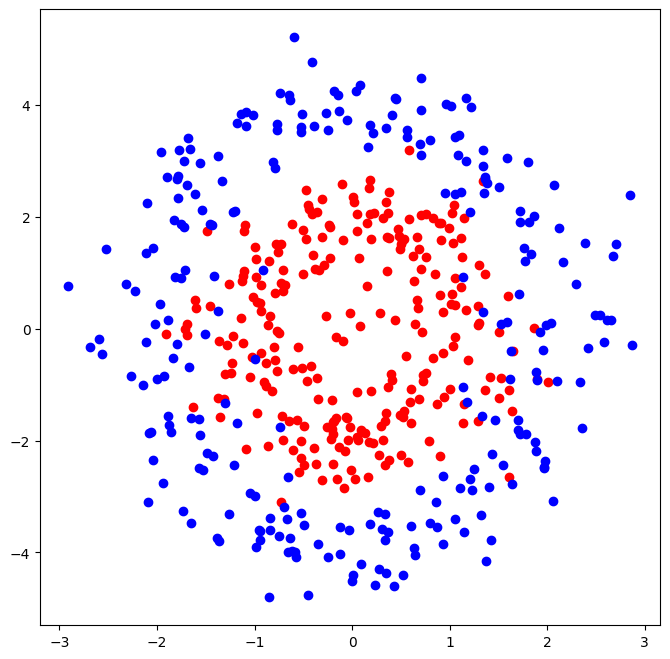

In [2]:
class MyPlot:
    def __init__(self):
        self.figsize = (8,8)
    
    def plot_point(self, x, y, label):
        plt.figure(figsize = self.figsize)
        x1 = [x[i] for i in range(len(x)) if label[i] == 0]
        x2 = [x[i] for i in range(len(x)) if label[i] == 1]
        y1 = [y[i] for i in range(len(y)) if label[i] == 0]
        y2 = [y[i] for i in range(len(y)) if label[i] == 1]
        plt.scatter(x1, y1, color = 'r', marker = 'o')
        plt.scatter(x2, y2, color = 'b', marker = 'o')
        plt.show()

plot = MyPlot()
plot.plot_point(x_train1, y_train1, label_train1)



In [ ]:
class MLPBinary:
    def __init__(self, d_in, d_hidden, seed=0):
        rng = np.random.default_rng(seed)
        self.W1 = rng.normal(0, 0.1, size=(d_hidden, d_in))
        self.b1 = np.zeros((d_hidden, 1))
        self.W2 = rng.normal(0, 0.1, size=(1, d_hidden))
        self.b2 = np.zeros((1, 1))

    def relu(self, a): return np.maximum(0, a)
    def d_relu(self, a): return (a > 0).astype(a.dtype)
    def sigmoid(self, z): return 1.0 / (1.0 + np.exp(-z))

    def forward(self, X):  # X: (N, d)
        X = X.T  # (d, N)
        A1 = self.W1 @ X + self.b1        # (h, N)
        H  = self.relu(A1)                 # (h, N)
        Z  = self.W2 @ H + self.b2         # (1, N)
        P  = self.sigmoid(Z)               # (1, N)
        cache = (X, A1, H, Z, P)
        return P, cache

    def bce_with_logits_loss(self, Z, y):  # Z: (1,N), y: (N,)
        y = y.reshape(1, -1)
        loss = np.mean(np.maximum(Z, 0) - y*Z + np.log1p(np.exp(-np.abs(Z))))
        return loss

    def backward(self, cache, y):  # y: (N,)
        X, A1, H, Z, P = cache
        N = X.shape[1]
        y = y.reshape(1, -1)

        dZ = P - y                          # (1, N)
        dW2 = (dZ @ H.T) / N                # (1, h)
        db2 = np.mean(dZ, axis=1, keepdims=True)

        dH  = self.W2.T @ dZ                # (h, N)
        dA1 = dH * self.d_relu(A1)          # (h, N)
        dW1 = (dA1 @ X.T) / N               # (h, d)
        db1 = np.mean(dA1, axis=1, keepdims=True)

        grads = (dW1, db1, dW2, db2)
        return grads

    def step(self, grads, lr=1e-2):
        dW1, db1, dW2, db2 = grads
        self.W1 -= lr * dW1
        self.b1 -= lr * db1
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
    
mlp = MLPBinary(d_in=len(x_train1), d_hidden=32)
for t in range(1000):
    P, cache = mlp.forward(x_train1)          # 확률
    Z = cache[3]                       # 로짓
    loss = mlp.bce_with_logits_loss(Z, y_train1)
    grads = mlp.backward(cache, y_train1)
    mlp.step(grads, lr=1e-2)

/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_4031/2546913558.py:15: RuntimeWarning: divide by zero encountered in matmul
  A1 = self.W1 @ X + self.b1        # (h, N)
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_4031/2546913558.py:15: RuntimeWarning: overflow encountered in matmul
  A1 = self.W1 @ X + self.b1        # (h, N)
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_4031/2546913558.py:15: RuntimeWarning: invalid value encountered in matmul
  A1 = self.W1 @ X + self.b1        # (h, N)
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_4031/2546913558.py:17: RuntimeWarning: divide by zero encountered in matmul
  Z  = self.W2 @ H + self.b2         # (1, N)
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_4031/2546913558.py:17: RuntimeWarning: overflow encountered in matmul
  Z  = self.W2 @ H + self.b2         # (1, N)
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_4031/2546913558.py:17: RuntimeWarning: invalid value

ValueError: operands could not be broadcast together with shapes (1,500) (1,32) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) 데이터 준비: (N,) + (N,) -> (N,2)
X = np.column_stack([x_train1, y_train1])      # (N, 2)
y = label_train1.astype(int).reshape(-1)       # (N,)

# 2) 모델 학습
mlp = MLPBinary(d_in=2, d_hidden=32)           # 입력 2차원(= x,y)
losses, steps = [], []

for t in range(1000):
    P, cache = mlp.forward(X)                  # P: (1,N) 확률
    Z = cache[3]                               # Z: (1,N) 로짓
    loss = mlp.bce_with_logits_loss(Z, y)
    grads = mlp.backward(cache, y)
    mlp.step(grads, lr=1e-2)

    if t % 10 == 0:
        losses.append(float(loss))
        steps.append(t)

# 3) 손실 곡선 확인
plt.figure(figsize=(6,4))
plt.plot(steps, losses, marker='o')
plt.xlabel('iteration'); plt.ylabel('loss'); plt.title('Training Loss (every 10 steps)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4) 결정경계(p=0.5) 시각화 (2D 전용)
pad = 0.5
x1_min, x1_max = X[:,0].min()-pad, X[:,0].max()+pad
x2_min, x2_max = X[:,1].min()-pad, X[:,1].max()+pad

xx, yy = np.meshgrid(
    np.linspace(x1_min, x1_max, 300),
    np.linspace(x2_min, x2_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]           # (M,2)

P_grid, _ = mlp.forward(grid)                  # (1,M) 확률
P_grid = P_grid.reshape(xx.shape)

# 클래스 마스크
m0 = (y == 0); m1 = (y == 1)

plt.figure(figsize=(7,6))
contour = plt.contourf(xx, yy, P_grid, levels=np.linspace(0,1,100), cmap='coolwarm')
plt.contour(xx, yy, P_grid, levels=[0.5], colors='black', linewidths=2)  # p=0.5 경계
plt.colorbar(contour, label='P(y=1)')

plt.scatter(X[m0,0], X[m0,1], s=20, c='red',  label='class 0')
plt.scatter(X[m1,0], X[m1,1], s=20, c='blue', label='class 1')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Decision Boundary (MLP, p=0.5)')
plt.legend(); plt.tight_layout(); plt.show()
